In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
import math
# Define the function for generating polynomial features
def poly_features(X, degree):
    n_samples = X.shape[0]
    X_poly = np.zeros((n_samples, degree))
    for i in range(degree):
        X_poly[:, i] = X[:, 0]**(i+1)
    return X_poly

# Define the function for scaling the features
def scale_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    #print(mean,std)
    X_scaled = (X - mean) / std
    return X_scaled

# Define the function for performing polynomial ridge regression
def poly_ridge_regression(X, y, degree, alpha):
    X_scaled = scale_features(X)
    X_poly = poly_features(X_scaled, degree)
    
    #print(X_poly)
    identity_matrix = np.identity(degree)
    w = (np.linalg.inv(X_poly.T @ X_poly + alpha * identity_matrix) @ X_poly.T @ y)
    #print(w)
    return w

# Define the function for making predictions
def predict(X, w, degree):
    X_scaled = scale_features(X)
    X_poly = poly_features(X_scaled, degree)
    y_pred = X_poly @ w
    return y_pred

# Define the function for performing cross-validation
def cross_validate(X, y, degree, alpha, k):
    n_samples = X.shape[0]
    indices = np.random.permutation(n_samples)
    fold_size = int(n_samples / k)
    scores = []
    for i in range(k):
        start, end = i*fold_size, (i+1)*fold_size
        test_indices = indices[start:end]
        train_indices = np.concatenate((indices[:start], indices[end:]))
        X_train, y_train = X[train_indices], y[train_indices]
        X_test, y_test = X[test_indices], y[test_indices]
        w = poly_ridge_regression(X_train, y_train, degree, alpha)
        y_pred = predict(X_test, w, degree)
        print(y_pred,y)
        score = np.mean((y_test - y_pred)**2)
        scores.append(score)
    return scores



In [3]:
class RidgeRegression() :
      
    def __init__( self, learning_rate, iterations, l2_penality ) :
          
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l2_penality = l2_penality
          
    # Function for model training            
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
          
        # weight initialization        
        self.W = np.zeros( self.n )
          
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        Y_pred = self.predict( self.X )
          
        # calculate gradients      
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.l2_penality * self.W ) ) / self.m     
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
        return self
      
    # Hypothetical function  h( x ) 
    def predict( self, X ) :    
        return X.dot( self.W ) + self.b

In [271]:
degree = 2
s = StandardScaler()
poly = PolynomialFeatures(degree, include_bias=False)
alpha = math.exp(0.01)

In [272]:
train = pd.DataFrame(np.genfromtxt('train.dat',
                     dtype=None,
                     delimiter=' ')).sort_values(["f0"])
test = pd.DataFrame(np.genfromtxt('test.dat',
                     dtype=None)).sort_values(["f0"])

In [273]:
X = np.array(train.f0).reshape(-1,1)
y = np.array(train.f1)
X_scaled = s.fit_transform(X)
X_scaled_poly = poly.fit_transform(X_scaled)

In [274]:
X_t = np.array(test.f0).reshape(-1,1)
y_t = np.array(test.f1)
X_test_s = s.fit_transform(X_t)
X_test_s_pol = poly.fit_transform(X_test_s)

In [275]:
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled_poly, y, 
                                            
                                          test_size = 1 / 4, random_state = 0 )

In [291]:
identity_matrix = np.identity(degree)
w = (np.linalg.inv(X_scaled_poly.T @ X_scaled_poly + alpha * identity_matrix) @ X_scaled_poly.T @ y)

In [292]:
y_p = X_test_s_pol @ w

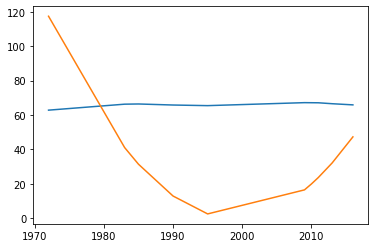

In [293]:
plt.plot(X_t,y_t)
plt.plot(X_t,y_p)

In [294]:
print("RMSE:",math.sqrt((np.square(y_t-y_p).mean())))

RMSE: 44.5540628558501


In [260]:
model = RidgeRegression( iterations = 1000,                             
                            learning_rate = 0.01, l2_penality = 12 )

In [261]:
model.fit( X_train, Y_train )

In [262]:
Y_pred = model.predict( X_test_s_pol )

In [264]:
Y_pred

array([-7.03587465e+39, -3.34934349e+38, -1.69777456e+38, -3.89140766e+37,
       -2.43730166e+37, -1.18500039e+38, -1.63416511e+38, -2.26759148e+38,
       -4.34286878e+38, -1.08586666e+39])

In [265]:
print("RMSE:",math.sqrt((np.square(y_t-Y_pred).mean())))

RMSE: 2.2606752148426746e+39


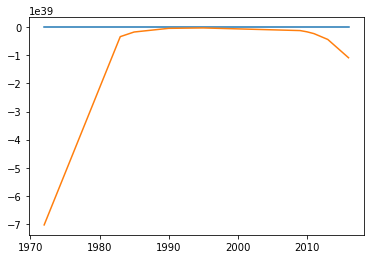

In [266]:
plt.plot(X_t,y_t)
plt.plot(X_t,Y_pred)